In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, rand_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Rescaling, SimpleRNN, Embedding, Reshape, AveragePooling2D
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
import glob
from random import randint
from PIL import Image
%matplotlib inline

# 99 no, 156 yes
rs = 12

In [190]:

def loss_acc_plot(hist):
    val_losses = hist.history['val_loss']
    val_accuracies = hist.history['val_accuracy']
    train_losses = hist.history['loss']
    train_accuracies = hist.history['accuracy']
    epochs = range(1, len(val_losses) + 1)

    sns.lineplot(x=epochs, y=val_losses, color='red')
    sns.lineplot(x=epochs, y=val_accuracies, color='blue')
    sns.lineplot(x=epochs, y=train_losses, color='purple')
    sns.lineplot(x=epochs, y=train_accuracies, color='green').set_ylim(bottom=0, top=2)
    plt.legend(labels=['validation loss', 'validation accuracy', 'training loss', 'training accuracy'])


In [191]:
def nn(layers, img_size=128, loss='binary_crossentropy', optimizer='adam', epochs=100, class_thresh=0.5, rs=12):
    img_size = (img_size, img_size)
    if rs == None:
        rs = randint(1, 1000)
    mris_train = keras.utils.image_dataset_from_directory(
        'brain_tumor_dataset/',
        validation_split=0.2,
        subset='training',
        seed=rs,
        image_size=img_size)
    mris_test = keras.utils.image_dataset_from_directory(
        'brain_tumor_dataset/',
        validation_split=0.2,
        subset='validation',
        seed=rs,
        image_size=img_size)
    
    

    model = Sequential(layers)

    es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=5)

    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
   
    hist = model.fit(
        mris_train,
        validation_data=mris_test,
        epochs=epochs,
        callbacks=[es]
    )
    model.summary()

    pred = model.predict(mris_test)

    pred[pred >= class_thresh] = 1
    pred[pred < class_thresh] = 0

    targ = np.concatenate([y for x, y in mris_test])

    disp = ConfusionMatrixDisplay(confusion_matrix(targ, pred))
    
    disp.plot()

    plt.show()

    loss_acc_plot(hist)

    return model

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 4s 445ms/step - loss: 0.6842 - accuracy: 0.5764 - val_loss: 0.6068 - val_accuracy: 0.6200
Epoch 2/100
7/7 [==============================] - 3s 389ms/step - loss: 0.5970 - accuracy: 0.6847 - val_loss: 0.4461 - val_accuracy: 0.7800
Epoch 3/100
7/7 [==============================] - 3s 362ms/step - loss: 0.5823 - accuracy: 0.6995 - val_loss: 0.4737 - val_accuracy: 0.8200
Epoch 4/100
7/7 [==============================] - 3s 356ms/step - loss: 0.5528 - accuracy: 0.7488 - val_loss: 0.4617 - val_accuracy: 0.8400
Epoch 5/100
7/7 [==============================] - 3s 357ms/step - loss: 0.4993 - accuracy: 0.7931 - val_loss: 0.4168 - val_accuracy: 0.8200
Epoch 6/100
7/7 [==============================] - 3s 385ms/step - loss: 0.5409 - accuracy: 0.7488 - val_loss: 0.4573 - val_accuracy: 0.8400
Epoch 7/100
7

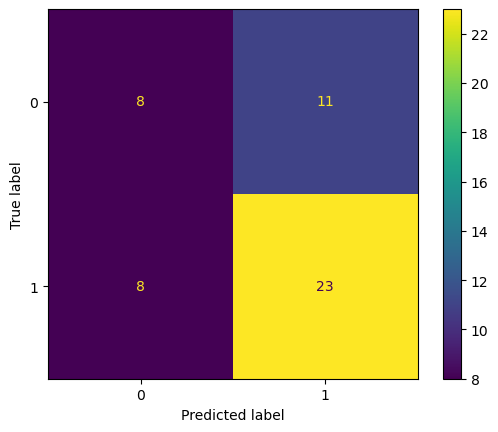

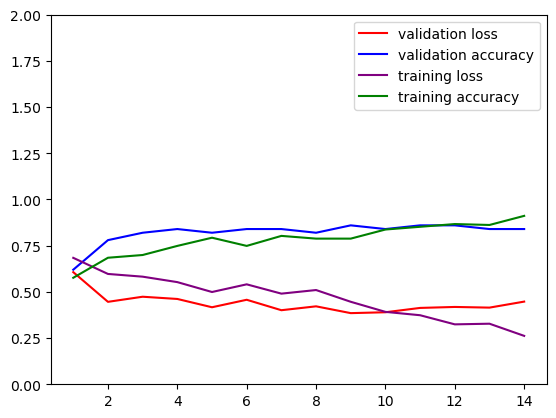

In [192]:
layers = [
    Rescaling(1./255),
    Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
]

nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 3s 366ms/step - loss: 0.4627 - accuracy: 0.8030 - val_loss: 0.3828 - val_accuracy: 0.8200
Epoch 2/100
7/7 [==============================] - 2s 334ms/step - loss: 0.4153 - accuracy: 0.8128 - val_loss: 0.3986 - val_accuracy: 0.8000
Epoch 3/100
7/7 [==============================] - 2s 337ms/step - loss: 0.3528 - accuracy: 0.8276 - val_loss: 0.3371 - val_accuracy: 0.8400
Epoch 4/100
7/7 [==============================] - 2s 336ms/step - loss: 0.2754 - accuracy: 0.8916 - val_loss: 0.3627 - val_accuracy: 0.8600
Epoch 5/100
7/7 [==============================] - 3s 340ms/step - loss: 0.3123 - accuracy: 0.8719 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 6/100
7/7 [==============================] - 3s 350ms/step - loss: 0.2580 - accuracy: 0.9015 - val_loss: 0.2552 - val_accuracy: 0.8800
Epoch 7/100
7

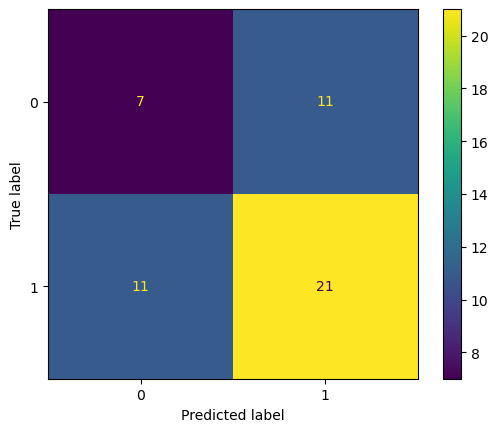

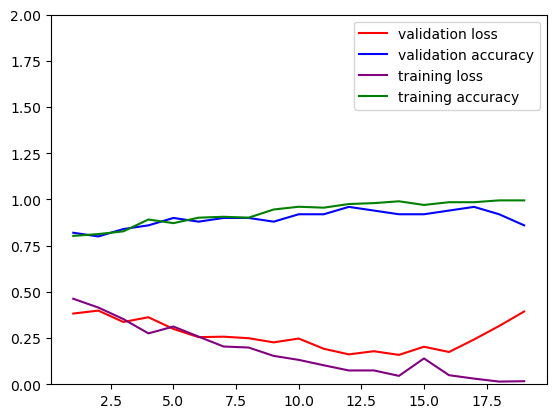

In [193]:
nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 3s 366ms/step - loss: 0.2244 - accuracy: 0.9606 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 3s 387ms/step - loss: 0.1023 - accuracy: 0.9606 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 3s 445ms/step - loss: 0.0575 - accuracy: 0.9852 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 3s 420ms/step - loss: 0.0465 - accuracy: 0.9951 - val_loss: 0.1086 - val_accuracy: 0.9400
Epoch 5/100
7/7 [==============================] - 3s 379ms/step - loss: 0.0335 - accuracy: 0.9951 - val_loss: 0.1311 - val_accuracy: 0.9600
Epoch 6/100
7/7 [==============================] - 3s 405ms/step - loss: 0.0369 - accuracy: 0.9803 - val_loss: 0.1196 - val_accuracy: 0.9600
Epoch 7/100
7

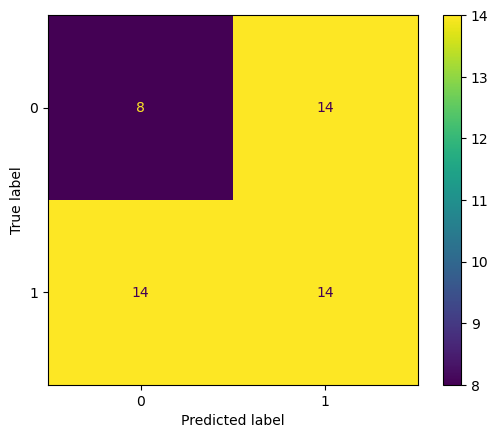

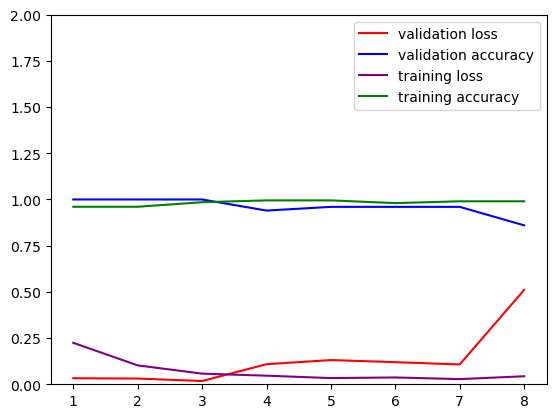

In [194]:
nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 4s 390ms/step - loss: 0.0999 - accuracy: 0.9507 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 3s 347ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 3s 469ms/step - loss: 0.0476 - accuracy: 0.9803 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 3s 400ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 3s 365ms/step - loss: 0.0423 - accuracy: 0.9951 - val_loss: 0.0396 - val_accuracy: 0.9800
Epoch 6/100
7/7 [==============================] - 3s 365ms/step - loss: 0.0455 - accuracy: 0.9901 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 7/100
7

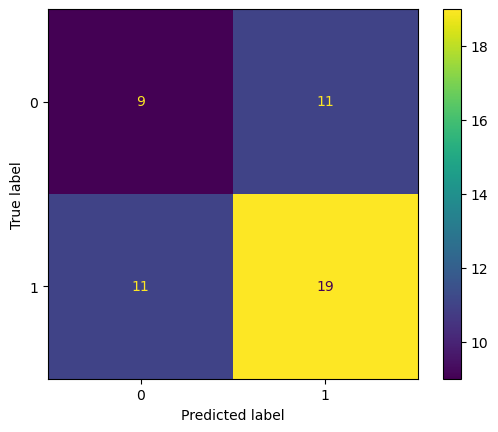

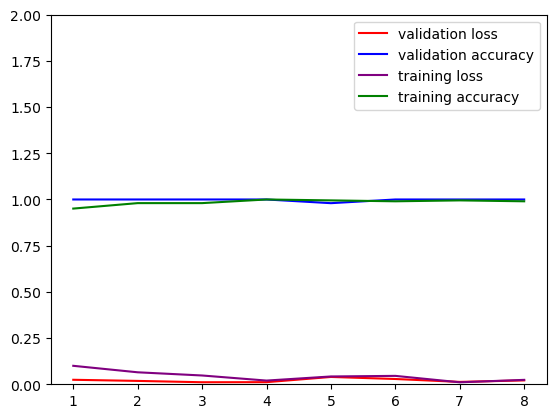

In [195]:
nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 3s 374ms/step - loss: 0.0474 - accuracy: 0.9803 - val_loss: 7.9781e-04 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 3s 343ms/step - loss: 0.0265 - accuracy: 0.9852 - val_loss: 3.5431e-04 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 3s 340ms/step - loss: 0.0173 - accuracy: 0.9901 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 3s 339ms/step - loss: 0.0514 - accuracy: 0.9901 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 3s 356ms/step - loss: 0.0216 - accuracy: 0.9951 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 3s 356ms/step - loss: 0.0187 - accuracy: 0.9901 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch

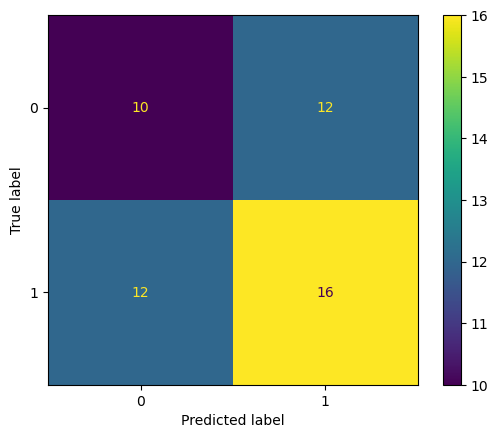

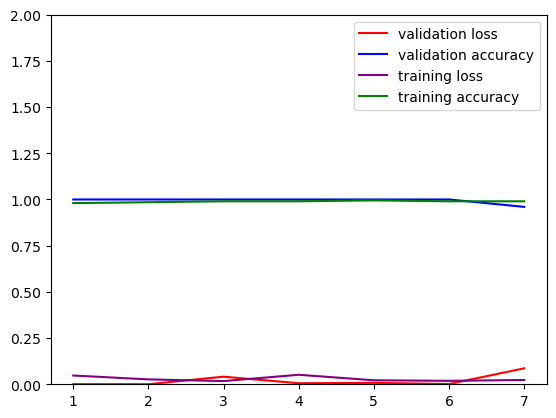

In [196]:
nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 3s 366ms/step - loss: 0.1178 - accuracy: 0.9803 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 3s 345ms/step - loss: 0.0448 - accuracy: 0.9852 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 3s 342ms/step - loss: 0.0283 - accuracy: 0.9901 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 3s 342ms/step - loss: 0.0220 - accuracy: 0.9951 - val_loss: 0.0932 - val_accuracy: 0.9800
Epoch 5/100
7/7 [==============================] - 3s 345ms/step - loss: 0.0326 - accuracy: 0.9951 - val_loss: 0.0244 - val_accuracy: 0.9800
Epoch 6/100
7/7 [==============================] - 3s 336ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.6665e-04 - val_accuracy: 1.0000
Epoch 7/1

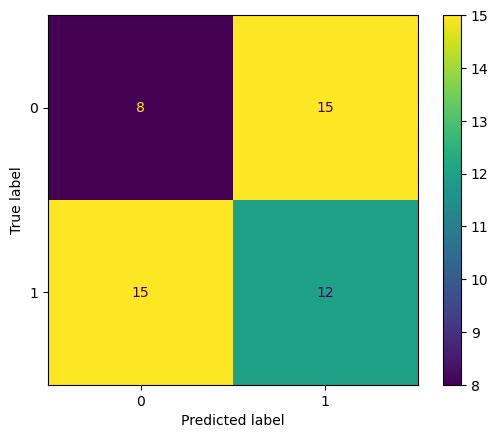

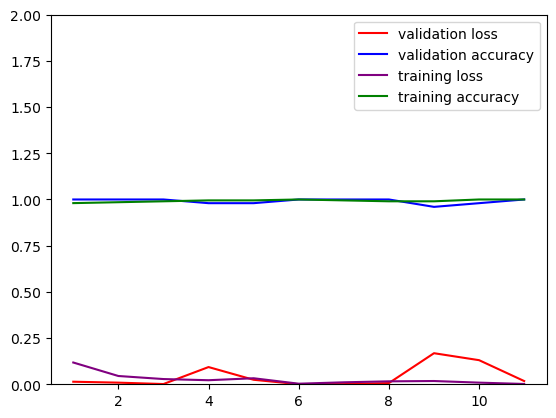

In [197]:
nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 4s 380ms/step - loss: 0.1124 - accuracy: 0.9852 - val_loss: 1.2048e-06 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 3s 341ms/step - loss: 0.0676 - accuracy: 0.9852 - val_loss: 9.6378e-04 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 3s 340ms/step - loss: 0.0618 - accuracy: 0.9803 - val_loss: 8.3461e-04 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 2s 338ms/step - loss: 0.0331 - accuracy: 0.9852 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 3s 340ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 4.2429e-04 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 3s 345ms/step - loss: 0.0180 - accuracy: 0.9901 - val_loss: 7.0837e-04 - val_accuracy: 

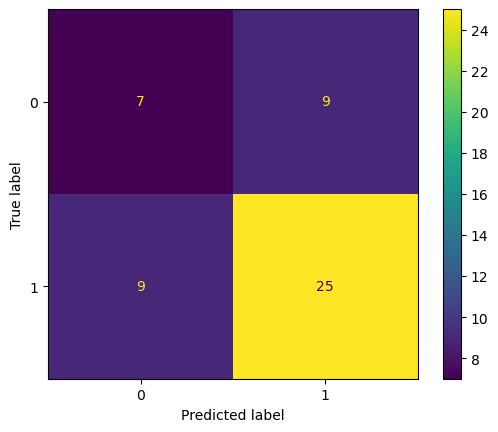

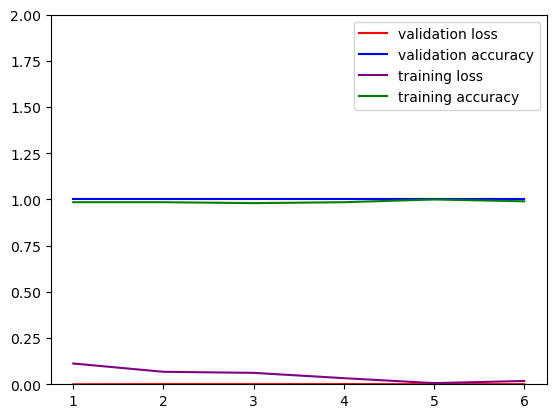

In [198]:
nn(layers, rs=None)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/100
7/7 [==============================] - 3s 373ms/step - loss: 0.0383 - accuracy: 0.9852 - val_loss: 0.0219 - val_accuracy: 0.9800
Epoch 2/100
7/7 [==============================] - 3s 354ms/step - loss: 0.0333 - accuracy: 0.9852 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 3s 342ms/step - loss: 0.0286 - accuracy: 0.9852 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 3s 349ms/step - loss: 0.0455 - accuracy: 0.9852 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 3s 343ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 3s 346ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/100
7

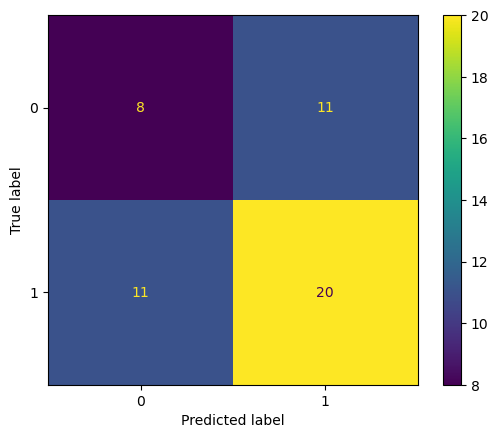

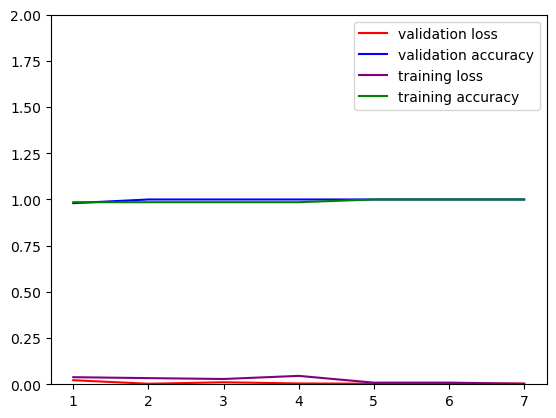

In [199]:
nn(layers, rs=None)